# Mandatory Assignment 7
## Submission Deadline: 22nd March, 2022

#### Reinforcement Learning and DecisionMaking Under Uncertainty IN-STK 5100/9100, Spring 2022, UiO
#### A. George, 8th March, 2022

## Description:
In this exercise, we will implement Monte Carlo and Temporal Difference Learning methods for state value prediction in **Markov Reward Processes**. \
Remember to **only fill in the marked gaps** and do not modify any other bits of code (except trying different parameters)!\
There are experiments provided at the end with whih you can **verify that your code is running correctly**.\
There are also discussion questions at the end of the notebook.

Let's start!

#### Some Notation:
- $\gamma$ discount factor
- $V(s)$ the estimated value of a state $s$
- $G$ the current observed return of an episode
- $R$ the current observed reward
- $\alpha$ the step-size parameter

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

## 1) Monte Carlo Methods

#### First-Visit MC:

We implement first-visit MC with initial values 0.5 for all non-terminal states and 0 for terminal states. Here, we update the state values as the average of the returns after every fist-visit to a state in any episode.
(For pseudo code see p. 92 in Sutton & Barto.)
- **start_state**: index (int) of the state in which we start every episode
- **n_states**: (int) the number of states in the MRP
- **n_episodes**: (int) the number of episodes that we observe
- **gamma**: (float) the dicount factor

In [13]:
def first_visit_MC(start_state,n_states,n_episodes,gamma):
    V = 0.5*np.ones(n_states)
    V[0] = 0
    V[n_states-1] = 0
    returns = [[] for s in range(n_states)]

    for e in range(n_episodes):
        #print(f"Episode {e} first visit MC")
        ### FILL IN THE GAP HERE:
        #   - generate the trajectory of the episode (using get_trajectory())
        #   - keep track of returns (for first-visits of a state)
        #   - update the state values
        trajectory = get_trajectory(start_state, n_states)
        S = trajectory[0]
        R = trajectory[1]
        T = len(S)
        G = 0

        for t in range(1, T):
            G = gamma * G + R[T- t]
            if S[T-t-1] not in S[:T-t-1]:                
                returns[S[T-t-1]].append(G)
                V[S[T-t-1]] = np.mean(returns[S[T-t-1]])
    return V

#### Every-Visit MC:

We implement every-visit MC with initial values 0.5 for all non-terminal states and 0 for terminal states. Here, we update the state values as the average of the returns after every visit to a state in any episode.
(For description see p. 92 in Sutton & Barto.)
- **start_state**: index (int) of the state in which we start every episode
- **n_states**: (int) the number of states in the MRP
- **n_episodes**: (int) the number of episodes that we observe
- **gamma**: (float) the dicount factor

In [14]:
def every_visit_MC(start_state,n_states,n_episodes,gamma):
    V = 0.5*np.ones(n_states)
    V[0] = 0
    V[n_states-1] = 0
    returns = [[] for s in range(n_states)]
    for e in range(n_episodes):
        #print(f"Episode {e} every visit MC")
        ### FILL IN THE GAP HERE:
        #   - generate the trajectory of the episode (using get_trajectory())
        #   - keep track of returns (for every visit of a state)
        #   - update the state values
        trajectory = get_trajectory(start_state, n_states)
        S = trajectory[0]
        R = trajectory[1]
        T = len(S)
        G = 0
        for t in range(1, T):
            G = gamma * G + R[T- t]
            returns[S[T-t-1]].append(G)
            V[S[T-t-1]] = np.mean(returns[S[T-t-1]])
                
    return V

#### Constant-$\alpha$ MC (every-visit):

We implement constant-$\alpha$ MC with initial values 0.5 for all non-terminal states and 0 for terminal states. Here,  we update the state values as the weighted average of the returns after every visit to a state $s$ in any episode as follows: $V(s) \leftarrow V(s) + \alpha \cdot (G-V(s))$.
(For description see p. 119-120 in Sutton & Barto.)
- **start_state**: index (int) of the state in which we start every episode
- **n_states**: (int) the number of states in the MRP
- **n_episodes**: (int) the number of episodes that we observe
- **alpha**: (float) the step-size parameter
- **gamma**: (float) the dicount factor

In [15]:
def constant_MC(start_state,n_states,n_episodes,alpha,gamma):
    V = 0.5*np.ones(n_states)
    V[0] = 0
    V[n_states-1] = 0
    for e in range(n_episodes):
        #print(f"Episode {e} constant-alpha MC")
        ### FILL IN THE GAP HERE:
        #   - generate the trajectory of the episode (using get_trajectory())
        #   - keep track of returns (for every visit of a state)
        #   - update the state values
        trajectory = get_trajectory(start_state, n_states)
        S = trajectory[0]
        R = trajectory[1]
        T = len(S)
        G = 0
        for t in range(1, T):
            G = gamma * G + R[T-t]
            V[S[T-t-1]] += alpha * (G - V[S[T-t-1]]) 

    return V

## 2) Temporal Difference Learning

#### TD(0):

We implement TD(0) with initial values 0.5 for all non-terminal states and 0 for terminal states. Here, we update the state values after every visit to a state $s$ in any episode as follows: $V(s) \leftarrow V(s) + \alpha \cdot (R + \gamma \cdot V(s') -V(s))$, where $r, s'$ are the state and reward that are observed after $s$.
(For pseudo code see p. 120 in Sutton & Barto.)
- **start_state**: index (int) of the state in which we start every episode
- **n_states**: (int) the number of states in the MRP
- **n_episodes**: (int) the number of episodes that we observe
- **alpha**: (float) the step-size parameter
- **gamma**: (float) the dicount factor

In [16]:
def TD_zero(start_state,n_states,n_episodes,alpha,gamma):
    V = 0.5*np.ones(n_states)
    V[0] = 0
    V[n_states-1] = 0
    for e in range(n_episodes):
        #print(f"Episode {e} TD(0)")
        ### FILL IN THE GAP HERE:
        #   - repeatedly generate the next state and reward (using next_state_reward()) 
        #     until the episode terminates
        #   - update the state values
        trajectory = get_trajectory(start_state, n_states)
        S = trajectory[0]
        R = trajectory[1]
        T = len(S)
        
        for t in range(T-1): 
            V[S[t]] += alpha * (R[t+1] + gamma*V[S[t+1]] - V[S[t]]) 
                ###R[t] here maybe? ^
            if S[t] == 0 or S[t] == n_states - 1:
                break

    return V

## 3) Evaluation

We consider the following (hard-coded) random walk Markov Reward Process in which there are no actions (see example on p. 125 in the Sutton&Barto book / lecture slides for more details).  

0 &larr; 1 &harr; 2 &harr; ... &harr; n-2 &rarr; n-1

- **States** $\{0, ..., n\}$, where $0$ and $n-1$ are terminal states
- **Start State** every episode starts in the same state
- **Transitions** with probability 0.5 move right, and move left otherwise
- **Rewards** receive reward 1 when reaching terminal state $n-1$ and 0 otherwise
- **Discount Factor** $\gamma = 1$


In [17]:
n_states = 7     # number of states 
gamma = 1        # discount factor
start_state = 3  # the state in which every episode starts

Starting from a state, we generate the next state and reward according to the transitions described above.

In [18]:
def next_state_reward(state, n_states): 
    # if the current state is a terminal state, there is no next state or reward to consider
    if state == 0 or state == n_states-1: 
        return None
    # otherwise ... the next state is with probability 0.5 to the right, and to the left otherwise
    #               the reward is always 0 unless the next state is the right terminal state (n-1)
    else:
        if np.random.binomial(size=1, n=1, p= 0.5) >= 0.5:
            return state+1, int((state+1 == n_states-1))            
        else:
            return state-1, 0

Starting from a state, we generate the trajectory of an episode using next_state_reward() described above.

In [19]:
def get_trajectory(state,n_states):
    s = state
    trajectory = []         # matrix of states (trajectory[0]) and rewards (trajectory[1]) for every round of the episode
    trajectory.append([])
    trajectory.append([])
    while s != 0 and s != n_states-1:       # while no terminal state has been reached yet...
        s,r = next_state_reward(s,n_states) # ... find the next state and reward
        trajectory[0].append(s)             # and update the trajectory accordingly.
        trajectory[1].append(r)
    return trajectory

### Verify your result:
All methods should find good approximations of the true state values after sufficiently many episodes.  
The true state values for non-terminal states are (state_index)/(n_states-1).  
We plot the averaged state values (over some number of runs) for different numbers of observed episodes.

Value estimates for varying numbers of episodes observed, averaged over 10 runs


(0, 0.9)

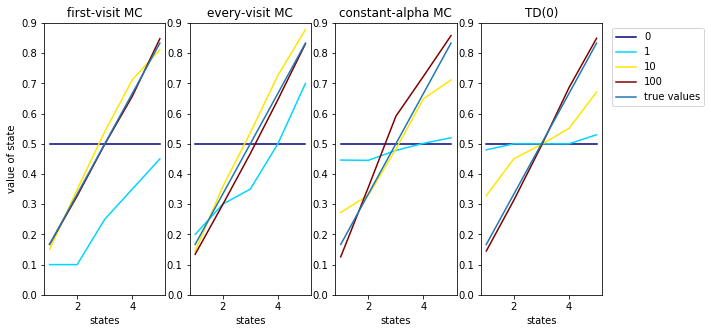

In [24]:
true_values = [s/(n_states-1) for s in range(1,n_states-1)] # the true state values
episodes = [0, 1, 10, 100]                                  # the number of episodes we want to consider
alpha = 0.1                                                 # the step-size parameter for constant-alpha MC and TD(0)
n_runs = 10                                                 # the number of runs over which we average the state values

# Initialising the average values for every number of episodes and every state, for all considered methods
FVMC_values = np.zeros((len(episodes), n_states))
EVMC_values = np.zeros((len(episodes), n_states))
aMC_values = np.zeros((len(episodes), n_states))
TD_values = np.zeros((len(episodes), n_states))

for idx, n_episodes in enumerate(episodes):
    for r in range(n_runs): # for every run add the values of the states that were computed after n_episodes
        FVMC_values[idx][:] += first_visit_MC(start_state,n_states,n_episodes,gamma)
        EVMC_values[idx][:] += every_visit_MC(start_state,n_states,n_episodes,gamma)
        aMC_values[idx][:]  += constant_MC(start_state,n_states,n_episodes,alpha,gamma)
        TD_values[idx][:]   += TD_zero(start_state,n_states,n_episodes,alpha,gamma)
    
    # average the computed state values
    FVMC_values[idx][:] /= n_runs
    EVMC_values[idx][:] /= n_runs
    aMC_values[idx][:]  /= n_runs
    TD_values[idx][:]   /= n_runs

print("Value estimates for varying numbers of episodes observed, averaged over", n_runs, "runs")
# set up the plots
states = np.arange(n_states-1)
states = states[1:]
colors = plt.cm.jet(np.linspace(0,1,len(episodes)))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(10,5))

# plots for first-visit MC
for i in range(len(episodes)):
    ax1.plot(states, FVMC_values[i][1:n_states-1], color=colors[i], label=str(episodes[i]))
ax1.plot(states, true_values, label='true values')
ax1.set_title("first-visit MC")
ax1.set_xlabel("states")
ax1.set_ylabel("value of state")
ax1.set_ylim([0, 0.9])

# plots for every-visit MC
for i in range(len(episodes)):
    ax2.plot(states, EVMC_values[i][1:n_states-1], color=colors[i], label=str(episodes[i]))
ax2.plot(states, true_values, label='true values')
ax2.set_title("every-visit MC")
ax2.set_xlabel("states")
ax2.set_ylim([0, 0.9])

# plots for constant-alpha MC (every-visit)
for i in range(len(episodes)):
    ax3.plot(states, aMC_values[i][1:n_states-1], color=colors[i], label=str(episodes[i]))
ax3.plot(states, true_values, label='true values')
ax3.set_title("constant-alpha MC")
ax3.set_xlabel("states")
ax3.set_ylim([0, 0.9])

# plots for TD(0)
for i in range(len(episodes)):
    ax4.plot(states, TD_values[i][1:n_states-1], color=colors[i], label=str(episodes[i]))
ax4.plot(states, true_values, label='true values')
ax4.set_title("TD(0)")
ax4.set_xlabel("states")
ax4.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax4.set_ylim([0, 0.9])

#### Parameter Testing:
In addition we can consider the Root Mean-Squared Error of the state value estimates given by TD(0) and constent-$\alpha$ methods and under different step-size parameters $\alpha$ and for different amounts of episodes averaged over 100 runs (compare plot on p. 125 in Sutton & Barto).

In [21]:
def RMS(true_v, learned_v):
    rms = math.sqrt(mean_squared_error(true_v, learned_v))
    return rms

Empirical RMS error, averaged over states and 100 runs


(0, 0.25)

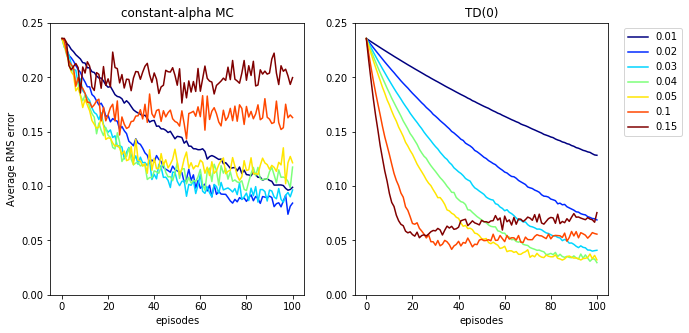

In [22]:
true_values = [s/(n_states-1) for s in range(1,n_states-1)] # the true state values
episodes = range(101)                                       # the number of episodes we want to consider
n_runs = 100                                                # the number of runs over which we average the RMS error
alphas = [0.01,0.02,0.03,0.04,0.05,0.1,0.15]                # the step-size parameters we try out for constant-alpha MC and TD(0)

# Initialise the RMS errors for various alphas, and numbers of episodes for both methods
TD_rms = np.zeros((len(alphas), len(episodes)))
alpha_MC_rms = np.zeros((len(alphas), len(episodes)))

for idx_e, n_episodes in enumerate(episodes):
    for idx_a, alpha in enumerate(alphas):
        for r in range(n_runs): # add up the RMS errors of the learned values from TD(0) and constant-alpha MC for fixed number of episodes and alpha
            learned_values = TD_zero(start_state,n_states,n_episodes,alpha,gamma)
            TD_rms[idx_a][idx_e] += RMS(true_values, learned_values[1:n_states-1])
            learned_values = constant_MC(start_state,n_states,n_episodes,alpha,gamma)
            alpha_MC_rms[idx_a][idx_e] += RMS(true_values, learned_values[1:n_states-1])
        # average the RMS errors w.r.t. the number of runs
        TD_rms[idx_a][idx_e] /= n_runs
        alpha_MC_rms[idx_a][idx_e] /= n_runs


print("Empirical RMS error, averaged over states and", n_runs, "runs")

# set up the plots
states = np.arange(n_states-1)
states = states[1:]
colors = plt.cm.jet(np.linspace(0,1,len(alphas)))
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

# plots for constant-alpha MC
for idx_a in range(len(alphas)):
    ax1.plot(episodes, alpha_MC_rms[idx_a], color=colors[idx_a], label=str(alphas[idx_a]))
ax1.set_title("constant-alpha MC")
ax1.set_xlabel("episodes")
ax1.set_ylabel("Average RMS error")
ax1.set_ylim([0, 0.25])

# plots for TD(0)
for idx_a in range(len(alphas)):
    ax2.plot(episodes, TD_rms[idx_a], color=colors[idx_a], label=str(alphas[idx_a]))
ax2.set_title("TD(0)")
ax2.set_xlabel("episodes")
ax2.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax2.set_ylim([0, 0.25])

## 4) Discussion

1. How do you interpret your results?
   - In the first plot we see that the state-values are 0.5 in the beginning. We can see that the estimated state-values converges towards the true value for each episode. The first plot also show that after the 
first- and every-visit MC converges faster than constant-alpha MC and TD(0). The second plot show the RMS for constant-alpha MC and TD(0) for multiple values of $\alpha$. It is clear that the optimal value of alpha is not the same for both methods. A larger value of alpha leads to faster convergence, but if it is too large, it does not stabilize. This is clear for $\alpha = 0.15$, where we for constant-alpha MC see unstable and large RMS, and for TD(0) see fast convergence, but then increasing RMS later.  
<br>
2. Why do we not consider Off-Policy Algorithms for the Random Walk Example?  
   - Because there is no choice of action, it is random 50/50 regardless. Without choice of action, we cannot differentiate between a target and behaviour policy  
<br>
1. Which could be more useful in the random walk example, exploring starts or applying an $\epsilon$-greedy policy?
   - Exploring starts would be more useful. The random walk is random, 50/50, so a greedy policy is pointless, as there is no choice of action. Exploring starts is exploring different starting states, which could be lead to faster convergence.
